<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis 1: Inspecting Data

_Authors: Kevin Markham (DC)_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# Ensures that plots appear inside the notebook.
# Not necessary in some versions of Jupyter Notebook / JupyterLab.
%matplotlib inline

In [3]:
DATA_DIR = '../assets/data'

## Demo

Recall the start of our bare-bones model building process:

```python
# Load the "Pandas" library -- think of it as spreadsheets in Python
import pandas as pd

# Use pandas to load in the data
ames_df = pd.read_csv('../assets/data/ames_train.csv')

# Look at the first five rows
ames_df.head(5)

# To get us started, use just the numeric columns without missing data
ames_df = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns')

# Split the data into the column `y` we want to predict and the 
# columns `X` we will use to make the predictions
X = ames_df.drop('SalePrice', axis='columns')
y = ames_df.loc[:, 'SalePrice']
```

All of these steps rely on the Pandas library -- Python's Swiss Army Knife for working with tabular data. In this lesson, we will learn to use Pandas to perform core data manipulation tasks such as selecting, sorting, filtering, summarizing, and joining.

## Pandas Data Types

Pandas provides two main datatypes: `DataFrame` and `Series`.

### DataFrame

- A DataFrame arranges data in rows and columns, like an Excel table.
- The `row index` contains a label for each row.
- The `column index` contains a label for each column.

When someone talks about **the** index of a DataFrame, they are generally referring to the `row index`.

In [4]:
# Example dataframe
my_df = pd.DataFrame({'a': [1, 1, 3, 4], 'b': ['x', 'y', 'y', 'z'], 'c': [5., 6., 5., 8.]})
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


### Series

A Pandas Series is similar to a single-column DataFrame, but it does not have a column index.

In [5]:
# Pandas series
# /scrub/
my_series = my_df.loc[:, 'a']
my_series

0    1
1    1
2    3
3    4
Name: a, dtype: int64

**Note**

It is possible to have a one-column DataFrame, which does have a `column index`. Sometimes the difference matters, so pay attention to it, especially if you are getting surprising errors.

In [6]:
one_column_df = my_df.loc[:, ['a']]
one_column_df

,a
0,1
1,1
2,3
3,4


## Vectorization

In [7]:
new_df = my_df.copy()

# don't do this!
for row_num, row in my_df.iterrows():
    new_df.loc[row_num, 'a'] = my_df.loc[row_num, 'a'] + 1

new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


For-loops are **slow** and **ugly**! Use vector and matrix math instead (to be discussed more in a later lesson).

In [8]:
new_df = my_df.copy()

# do this instead
# /scrub/
new_df.loc[:, 'a'] = my_df.loc[:, 'a'] + 1
new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


`pandas` automatically "broadcasts" to match dimensions when possible

**Exercise (3 mins.)**

- Multiply column "a" of `new_df` by 3 and assign the result back to column "a" of the dataframe as above.

In [9]:
# /scrub/
new_df.loc[:, 'a'] = my_df.loc[:, 'a'] * 3
new_df

,a,b,c
0,3,x,5.0
1,3,y,6.0
2,9,y,5.0
3,12,z,8.0


- Use `*` to multiply column "a" of `new_df` by column `c` of `new_df`. Simply display the result, without changing `new_df`. What math did `pandas` do to get this result?

In [10]:
# /scrub/
new_df.loc[:, 'a'] * new_df.loc[:, 'c']

0    15.0
1    18.0
2    45.0
3    96.0
dtype: float64

/scrub/

Pandas multiplied the two columns elementwise.

$\blacksquare$

## DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., my_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

In [11]:
# View row index
# /scrub/
my_df.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
# View column index
# /scrub/
my_df.columns

Index(['a', 'b', 'c'], dtype='object')

In [13]:
# Select first n rows, 5 by default
# /scrub/
my_df.head()

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


In [14]:
# Select first 2 rows
# /scrub/
my_df.head(2)

,a,b,c
0,1,x,5.0
1,1,y,6.0


In [15]:
# Select last 2 rows
# /scrub/
my_df.tail(2)

,a,b,c
2,3,y,5.0
3,4,z,8.0


In [16]:
# See the types of the columns
# /scrub/
my_df.dtypes

a      int64
b     object
c    float64
dtype: object

In [17]:
# Get the number of rows and columns
# /scrub/
my_df.shape

(4, 3)

In [18]:
# Get a concise summary of DataFrame contents "from the computer's perspective"
# /scrub/
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
a    4 non-null int64
b    4 non-null object
c    4 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


In [19]:
# Get a concise summary of DataFrame contents from a data modeler's perspective
# /scrub/
my_df.describe()

,a,c
count,4.00,4.000000
mean,2.25,6.000000
std,1.50,1.414214
min,1.00,5.000000
25%,1.00,5.000000
50%,2.00,5.500000
75%,3.25,6.500000
max,4.00,8.000000


In [20]:
# Get summary information for non-numeric columns
# /scrub/
my_df.describe(include='object')

,b
count,4
unique,3
top,y
freq,2


In [21]:
# Get the means of the numeric columns
# /scrub/
my_df.mean()

a    2.25
c    6.00
dtype: float64

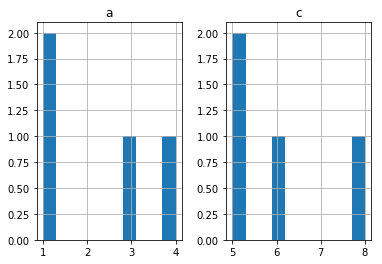

In [22]:
# Get histograms of the numeric columns.
# /scrub/
axes = my_df.hist()

**Matplotlib terminology.** The plot above displays two matplotlib `Axes` objects within one matplotlib `Figure`. Confusingly, an `Axes` (not a typo) typically has an x-axis and a y-axis.

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

Get in the habit of inspecting the return values of plotting functions (usually one or more `Axes` objects) and assigning them to variables so that you can use their methods and attributes to customize the plot.

In [23]:
# We defined `DATA_DIR` at the top of the notebook -- it is a string that gives
# the path to the data that we are using for this lesson. Using this variable
# rather than hard-coding each data file's full path saves keystrokes, reduces
# opportunities for error, and makes it easier to update the code if the data
# moves.
# /scrub/
users_path = f'{DATA_DIR}/user.tbl'
users = pd.read_csv(users_path, sep='|')

**Exercise (5 mins.)** Use the `users` DataFrame for the following exercises.

- Print the first 30 rows.

In [24]:
# /scrub/
users.head(30)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


- Print the last 20 rows.

In [25]:
# /scrub/
users.tail(20)

,user_id,age,gender,occupation,zip_code
923,924,29,M,other,11753
924,925,18,F,salesman,49036
925,926,49,M,entertainment,01701
926,927,23,M,programmer,55428
927,928,21,M,student,55408
928,929,44,M,scientist,53711
929,930,28,F,scientist,07310
930,931,60,M,educator,33556
931,932,58,M,educator,06437
932,933,28,M,student,48105


- Use the built-in Python function `type` to get the type of `users`.

In [26]:
# /scrub/
type(users)

pandas.core.frame.DataFrame

- Get the row index.

In [27]:
# /scrub/
users.index

RangeIndex(start=0, stop=943, step=1)

- Get the column names.

In [28]:
# /scrub/
users.columns           

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

- Get the data types of the columns.

In [29]:
# /scrub/
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

- Get the number of rows and columns.

In [30]:
# /scrub/
users.shape

(943, 5)

- Get concise summary of contents of `users` (types, memory use, etc.)

In [31]:
# /scrub/
users.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


- Get summary statistics for `users`.

In [32]:
# /scrub/
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


$\blacksquare$

## Selecting Rows and Columns

There are many ways to slice DataFrames.

### Recommended Approach

Use `.loc` and `.iloc`.

In [33]:
# Select columns "a" and "b" using .loc, passing in both column names
# /scrub/
print(my_df.loc[:, ['a', 'b']])

   a  b
0  1  x
1  1  y
2  3  y
3  4  z


In [34]:
# Select columns "a" and "b" using .loc, passing in a range of column names
# /scrub/
print(my_df.loc[:, :'b'])

   a  b
0  1  x
1  1  y
2  3  y
3  4  z


In [35]:
# Select columns "a" and "b" using .iloc
# /scrub/
my_df.iloc[:, :2]

,a,b
0,1,x
1,1,y
2,3,y
3,4,z


**Note:** It is generally good practice to use column names (`.loc`) rather than positions (`.iloc`).

In [36]:
# Select rows 1 and 2 using .loc
# /scrub/
my_df.loc[1:2, :]

,a,b,c
1,1,y,6.0
2,3,y,5.0


In [37]:
# Select rows 1 and 2 using .iloc
# /scrub/
my_df.iloc[1:3, :]

,a,b,c
1,1,y,6.0
2,3,y,5.0


In [38]:
# Select row 1 from columns "b" and "c" using .loc. What type is the result?
# /scrub/
my_df.loc[1, ['b', 'c']]

b    y
c    6
Name: 1, dtype: object

In [39]:
# Select row 1 from columns "b" and "c" using .loc so that the result is a DataFrame
# /scrub/
my_df.loc[[1], ['b', 'c']]

,b,c
1,y,6.0


In [40]:
# Select row 1 from columns "b" and "c" using .iloc
# /scrub/
my_df.iloc[1, 1:]

b    y
c    6
Name: 1, dtype: object

In [41]:
# .loc and .iloc also work on Series, but with a Series there is only
# one dimension to select on.
# /scrub/
my_series = my_df.loc[1, ['b', 'c']]
print(my_series.loc['b'])
print(my_series.iloc[0])

y
y


### Alternative approaches

I do not recommend using these approaches, but you should be able to recognize them.

In [42]:
# Dictionary-style column selection
my_df['c']

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [43]:
# Selecting multiple columns
my_df[['b', 'c']]

,b,c
0,x,5.0
1,y,6.0
2,y,5.0
3,z,8.0


In [44]:
# Slicing into a series
my_df['c'][0]

5.0

In [45]:
# Dot syntax
my_df.c

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [46]:
# Slicing into a series
my_df.c[1]

6.0

**Note:** There is no consensus about the "best way" to slice DataFrames, but here are some reasons that lead me to prefer `.loc` and `.iloc`:

- They are more flexible:
    - You can select a single row with `df.loc[row_label, :]` but not with slice or dot syntax.
    - You can select a list of rows with `df.loc[[row_label1, row_label2], :]` but not with slice or dot syntax.
    - You can slice columns with `df.loc[:, 'A':'C']` but not with slice or dot syntax.
    - Unlike `.` syntax, `.loc` and `.iloc` allow you to select columns that are not valid Python variable names (e.g. columns whose names start with numbers or contain spaces) or that have the same name as a variable or DataFrame method or attribute.
- They are more explicit:
    - They show clearly where you are operating on rows and where you are operating on columns. (Square brackets select columns when a string is passed and filter rows when a Boolean series is passed, which can be confusing, whereas `.loc` always operates on rows before the comma and on columns after the comma.)
    - They show clearly whether you are selecting by name or by position.
- They consistently allow you to assign values to elements of a DataFrame when selecting on both rows and columns. (See [this Stack Overflow post](https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte).)

`.loc` and `.iloc` do require more keystrokes than the alternatives, but **getting confused about what your code is doing will cost you far more time than banging out a few more characters**.

There are also additional attributes such as `.ix`, `.at`, and `.iat`, but there is a consensus that you should use `.loc` and `.iloc` over those alternatives.

**Exercise (6 mins.)**

Use the `users` DataFrame for the following exercises. (This DataFrame should be loaded into memory already. Run the code above if it is not.)

- Select the "gender" column using `.loc`.

In [47]:
# /scrub/
users.loc[:, 'gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using `.loc.`

In [48]:
# /scrub/
users.loc[10:20, 'gender']

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Select the "gender" column using `.iloc`.

In [49]:
# /scrub/
users.iloc[:, 2]

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using `.iloc`.

In [50]:
# /scrub/
users.iloc[10:21, 2]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Get the type of the object returned from the previous cell.

In [51]:
# /scrub/
type(users.iloc[10:21, 2])

pandas.core.series.Series

- Get summary statistics for all numeric columns.

In [52]:
# /scrub/
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


- Get summary information about all `object` columns.

In [53]:
# /scrub/
users.describe(include='object')

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


- Calculate the mean of the ages.

In [54]:
# /scrub/
users.loc[:, 'age'].mean()

34.05196182396607

- Create a histogram of the `ages` column.

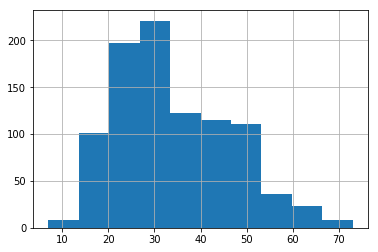

In [55]:
# /scrub/
ax = users.loc[:, 'age'].hist()

$\blacksquare$

## Frequency Distributions

In [56]:
# /scrub/
users.loc[:, 'gender'].value_counts()     # most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

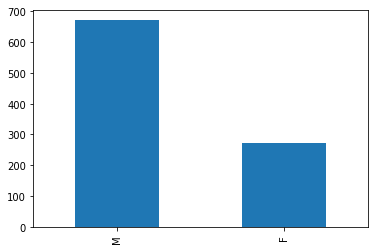

In [57]:
# quick plot by category
# /scrub/
ax = users.loc[:, 'gender'].value_counts().plot(kind='bar')

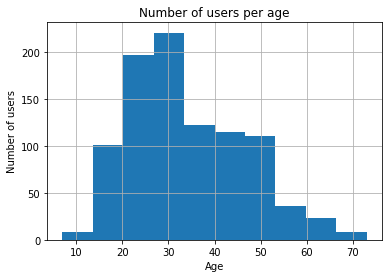

In [58]:
# Plot age histogram with plot title and axis labels
# /scrub/

ax = users.loc[:, 'age'].hist()
ax.set_xlabel('Age')
ax.set_ylabel('Number of users')
ax.set_title('Number of users per age');

**Notes:**

- You will often see people create plots in a different way, using `matplotlib` functions calls such as `plt.title('Number of users on page')` rather than `Axes` methods such as `ax.set_title('Number of users on page')`. **In the long run, you are better off using the approach illustrated here**; see http://pbpython.com/effective-matplotlib.html and https://realpython.com/python-matplotlib-guide/.
- Recent versions of Jupyter show plots inside the notebook automatically. Older versions require running `%matplotlib inline` to activate this feature. Outside Jupyter, you typically need to run `plt.show()` to render a plot in a popup window.

In [59]:
# Read drinks.csv into a DataFrame called 'drinks'
# /scrub/
drinks_path = f'{DATA_DIR}/drinks.csv'
drinks = pd.read_csv(drinks_path)

**Exercise (4 mins.)**

- Print the first five rows.

In [60]:
# /scrub/
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


- Print the last five rows.

In [61]:
# /scrub/
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


- Print the index.

In [62]:
# /scrub/
drinks.index

RangeIndex(start=0, stop=193, step=1)

- Print the column types.

In [63]:
# /scrub/
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

- Print the number of rows and columns.

In [64]:
# /scrub/
drinks.shape

(193, 6)

- Print the "beer_servings" column as a Series.

In [65]:
# /scrub/
drinks.loc[:, 'beer_servings']

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

- Calculate the average 'beer_servings' for the entire dataset.

In [66]:
# /scrub/
drinks.loc[:, 'beer_servings'].mean()

106.16062176165804

- Count the number of occurrences of each 'continent' value.

In [67]:
# /scrub/
drinks.loc[:, 'continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

- **BONUS:** What is wrong with the last result? How did the problem arise?

In [68]:
# /scrub/
drinks.loc[drinks.loc[:, 'continent'].isna(), :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


/scrub/

North America is missing because "NA" was read as indicating missing values.

$\blacksquare$

## Filtering

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

### Filtering on a Single Condition

In [69]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
# /scrub/
young_bool = users.loc[:, 'age'] < 20
young_bool

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [70]:
# ...and use that Series to filter rows
# /scrub/
users.loc[young_bool, :]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [71]:
# or, combine into a single step -- which one is easier to read?
# /scrub/
users.loc[users.loc[:, 'age'] < 20, :]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [72]:
# select "occupation" column from the filtered results
# /scrub/
users.loc[young_bool, 'occupation']

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
205          student
220          student
222          student
245          student
256          student
257          student
261          student
269          student
280          student
288             none
290          student
302          student
319          student
340          student
346          student
366          student
367          student
374    entertainment
392          student
396          student
           ...      
600           artist
608          student
617          student
618          student
619           writer
620          student
623          student
627             none
630          student
631          student
641          student
645          student
673          student
699          student
709          student
728          student
746          

In [73]:
# value_counts of resulting Series
# /scrub/
users.loc[users.loc[:, 'age'] < 20, 'occupation'].value_counts()

student          64
other             4
none              3
entertainment     2
writer            2
salesman          1
artist            1
Name: occupation, dtype: int64

### Filtering on Multiple Conditions

In [74]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!
# /scrub/
users.loc[(users.loc[:, 'age'] < 20) & (users.loc[:, 'gender'] == 'M'), :]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [75]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
# /scrub/
users.loc[(users.loc[:, 'age'] < 20) | (users.loc[:, 'age'] > 60), :]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
105,106,61,M,retired,55125
109,110,19,M,student,77840
141,142,13,M,other,48118


In [76]:
# preferred alternative to multiple OR conditions
# /scrub/
users.loc[users.occupation.isin(['doctor', 'lawyer']), :]

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


In [77]:
# tilde for NOT condition. (this is a "bitwise" NOT)
# /scrub/
users.loc[~(users.loc[:, 'age'] < 20), :]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


**Exercise (3 mins.)**

- Filter the DataFrame to include only European countries.

In [78]:
# /scrub/
drinks.loc[drinks['continent'] == 'EU', :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


- Filter the DataFrame to include only European countries with more than 300 `wine_servings`.

In [79]:
# /scrub/
drinks.loc[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300), :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


- Calculate the average 'beer_servings' for all of Europe.

In [80]:
# /scrub/
drinks.loc[drinks['continent'] == 'EU', 'beer_servings'].mean()

193.77777777777777

$\blacksquare$